In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from datetime import time 
import glob
import random
import cv2
from sklearn.manifold import TSNE

# Question 1 - Part 1

In [2]:
df = pd.read_csv("data/covid_19_india.csv")
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
df['Date']= pd.to_datetime(df['Date'])
df['Date'].max()

Timestamp('2021-08-11 00:00:00')

In [ ]:
df['Date'].min()

Timestamp('2020-01-30 00:00:00')

In [ ]:
df['Time'].value_counts()

8:00 AM     16472
5:00 PM       899
6:00 PM       600
7:30 PM        56
8:30 PM        28
9:30 PM        28
10:00 AM       27
Name: Time, dtype: int64

In [ ]:
df['State/UnionTerritory'].value_counts()

Kerala                                      560
Delhi                                       528
Rajasthan                                   527
Haryana                                     526
Uttar Pradesh                               526
Ladakh                                      523
Tamil Nadu                                  523
Jammu and Kashmir                           521
Punjab                                      521
Maharashtra                                 520
Karnataka                                   520
Andhra Pradesh                              518
Uttarakhand                                 515
Odisha                                      514
Puducherry                                  512
West Bengal                                 512
Chhattisgarh                                511
Chandigarh                                  511
Gujarat                                     510
Himachal Pradesh                            508
Madhya Pradesh                          

In [4]:
confrmindian=df[df['ConfirmedIndianNational'] != '-']['ConfirmedIndianNational']
confrm = confrmindian.astype('int64')
print(confrm.min())
print(confrm.max())

0
177


In [5]:
confrmforeign=df[df['ConfirmedForeignNational'] != '-']['ConfirmedForeignNational']
foreign= confrmforeign.astype('int64')
print(foreign.min())
print(foreign.max())

0
14


In [6]:
print(df['Cured'].max())
print(df['Cured'].min())

6159676
0


In [7]:
print(df['Deaths'].max())
print(df['Deaths'].min())

134201
0


In [8]:
print(df['Confirmed'].max())
print(df['Confirmed'].min())


6363442
0


In [10]:
dv = pd.read_csv("data/covid_vaccine_statewise.csv")
dv

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dv.columns

Index(['Updated On', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [12]:
formatted_updatedate= pd.to_datetime(dv['Updated On'])
print(formatted_updatedate.min())
print(formatted_updatedate.max())

2021-01-02 00:00:00
2021-12-08 00:00:00


In [13]:
dv.min()

Updated On                                              01/02/2021
State                                  Andaman and Nicobar Islands
Total Doses Administered                                         7
Sessions                                                         0
 Sites                                                           0
First Dose Administered                                          7
Second Dose Administered                                         0
Male (Doses Administered)                                        0
Female (Doses Administered)                                      2
Transgender (Doses Administered)                                 0
 Covaxin (Doses Administered)                                    0
CoviShield (Doses Administered)                                  7
Sputnik V (Doses Administered)                                   0
AEFI                                                             0
18-44 Years (Doses Administered)                             2

In [14]:
dv.max()

Updated On                              31/07/2021
State                                  West Bengal
Total Doses Administered               5.13228e+08
Sessions                               3.50103e+07
 Sites                                       73933
First Dose Administered                 4.0015e+08
Second Dose Administered               1.13078e+08
Male (Doses Administered)              2.70164e+08
Female (Doses Administered)            2.39519e+08
Transgender (Doses Administered)             98275
 Covaxin (Doses Administered)          6.23674e+07
CoviShield (Doses Administered)        4.46825e+08
Sputnik V (Doses Administered)              588039
AEFI                                         26542
18-44 Years (Doses Administered)        2.2433e+08
45-60 Years (Doses Administered)       1.66757e+08
60+ Years (Doses Administered)         1.18693e+08
18-44 Years(Individuals Vaccinated)    9.22431e+07
45-60 Years(Individuals Vaccinated)    9.09689e+07
60+ Years(Individuals Vaccinate

In [15]:
dv['State'].value_counts()

Delhi                                       213
Manipur                                     212
Telangana                                   212
Uttarakhand                                 212
Odisha                                      212
Sikkim                                      212
Assam                                       212
Dadra and Nagar Haveli and Daman and Diu    212
Kerala                                      212
Nagaland                                    212
West Bengal                                 212
Rajasthan                                   212
Meghalaya                                   212
Andaman and Nicobar Islands                 212
Uttar Pradesh                               212
Mizoram                                     212
Haryana                                     212
Andhra Pradesh                              212
Punjab                                      212
Lakshadweep                                 212
Jammu and Kashmir                       

In [16]:
print(dv["Total Doses Administered"].min())
print(dv["Total Doses Administered"].max())

7.0
513228400.0


In [17]:
print(dv["Sessions"].min())
print(dv["Sessions"].max())

0.0
35010311.0


In [24]:
dv[' Sites ']


0        2957.0
1        4954.0
2        6583.0
3        7951.0
4       10504.0
         ...   
7840        NaN
7841        NaN
7842        NaN
7843        NaN
7844        NaN
Name:  Sites , Length: 7845, dtype: float64

In [25]:
print(dv["First Dose Administered"].min())
print(dv["First Dose Administered"].max())

7.0
400150406.0


In [26]:
print(dv["Second Dose Administered"].min())
print(dv["Second Dose Administered"].max())

0.0
113077994.0


In [27]:
print(dv["Male (Doses Administered)"].min())
print(dv["Male (Doses Administered)"].max())

0.0
270163622.0


In [28]:
print(dv["Female (Doses Administered)"].min())
print(dv["Female (Doses Administered)"].max())

2.0
239518609.0


In [29]:
print(dv["Transgender (Doses Administered)"].min())
print(dv["Transgender (Doses Administered)"].max())

0.0
98275.0


In [30]:
print(dv[" Covaxin (Doses Administered)"].min())
print(dv[" Covaxin (Doses Administered)"].max())



0.0
62367416.0


In [31]:
print(dv["CoviShield (Doses Administered)"].min())
print(dv["CoviShield (Doses Administered)"].max())



7.0
446825051.0


In [32]:
print(dv["Sputnik V (Doses Administered)"].min())
print(dv["Sputnik V (Doses Administered)"].max())



0.0
588039.0


In [33]:
print(dv["AEFI"].min())
print(dv["AEFI"].max())



0.0
26542.0


In [34]:
print(dv["18-44 Years (Doses Administered)"].min())
print(dv["18-44 Years (Doses Administered)"].max())



26624.0
224330364.0


In [35]:
print(dv["45-60 Years (Doses Administered)"].min())
print(dv["45-60 Years (Doses Administered)"].max())



16815.0
166757453.0


In [36]:
print(dv["60+ Years (Doses Administered)"].min())
print(dv["60+ Years (Doses Administered)"].max())



9994.0
118692689.0


In [37]:
print(dv["18-44 Years(Individuals Vaccinated)"].min())
print(dv["18-44 Years(Individuals Vaccinated)"].max())



1059.0
92243148.0


In [38]:
print(dv["45-60 Years(Individuals Vaccinated)"].min())
print(dv["45-60 Years(Individuals Vaccinated)"].max())



1136.0
90968877.0


In [39]:
print(dv["60+ Years(Individuals Vaccinated)"].min())
print(dv["60+ Years(Individuals Vaccinated)"].max())

558.0
67310981.0


In [40]:
print(dv["Male(Individuals Vaccinated)"].min())
print(dv["Male(Individuals Vaccinated)"].max())

23757.0
134941971.0


In [41]:
print(dv["Female(Individuals Vaccinated)"].min())
print(dv["Female(Individuals Vaccinated)"].max())

24517.0
115668447.0


In [42]:
print(dv["Transgender(Individuals Vaccinated)"].min())
print(dv["Transgender(Individuals Vaccinated)"].max())

2.0
46462.0


In [43]:
print(dv["Total Individuals Vaccinated"].min())
print(dv["Total Individuals Vaccinated"].max())

7.0
250656880.0


# Question 1 - Part 2

In [44]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [45]:
yc=df['Cured']
ycc=df['Confirmed']
ycd=df['Deaths']
x=df['Date']

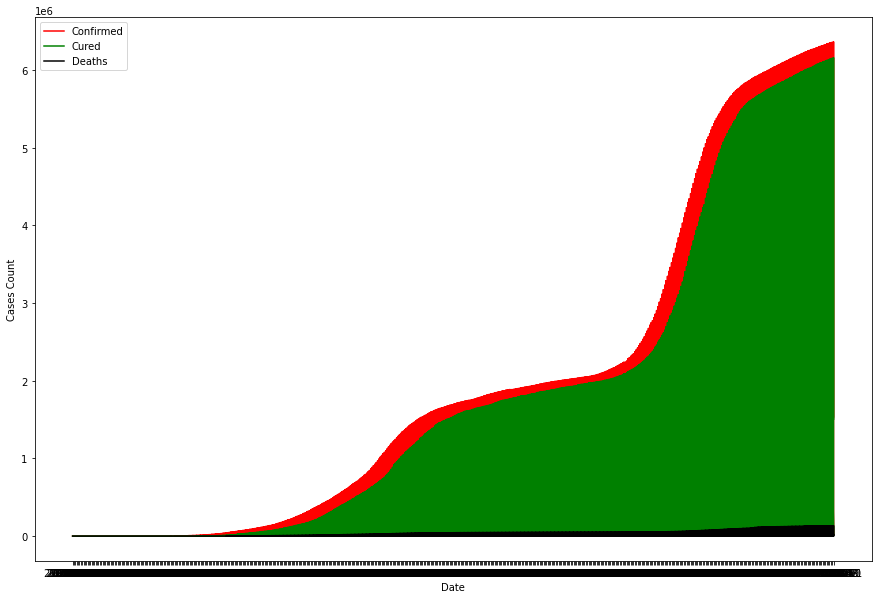

In [46]:
plt.figure(figsize=(15,10))
plt.plot(x,ycc,color='red',label='Confirmed')
plt.plot(x,yc,color='green',label='Cured')
plt.plot(x,ycd,color='black',label='Deaths')
plt.xlabel('Date')
plt.ylabel('Cases Count')
plt.legend()
plt.show()

# Question 1 - Part 3

In [47]:
dv

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
state=['Kerala','Delhi', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Tamil Nadu']
covishield=[]
cowaxin=[]
sputnik=[]
for x in state:
  covishield.append(dv[dv['State']==x]['CoviShield (Doses Administered)'].sum(axis=0))
  cowaxin.append(dv[dv['State']==x][' Covaxin (Doses Administered)'].sum(axis=0))
  sputnik.append(dv[dv['State']==x]['Sputnik V (Doses Administered)'].sum(axis=0))

print(covishield)
print(cowaxin)
print(sputnik)

[1434197931.0, 592068871.0, 2442166197.0, 782914023.0, 2955198559.0, 1337448910.0]
[121110027.0, 218692040.0, 246809265.0, 129521424.0, 381441691.0, 240280582.0]
[582603.0, 1017693.0, 228872.0, 1001912.0, 369784.0, 775724.0]


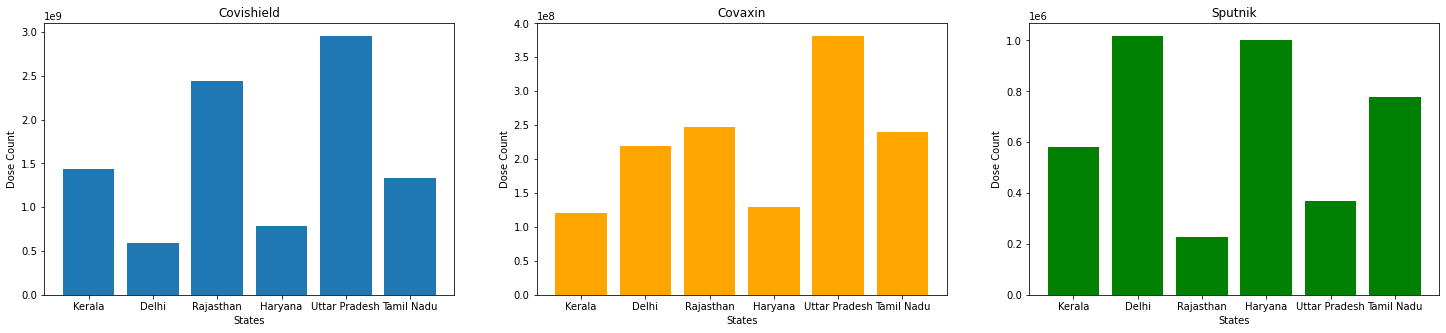

In [50]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
ax[0].title.set_text('Covishield')
ax[0].set_xlabel('States')
ax[0].set_ylabel('Dose Count')
ax[0].bar(state,covishield)
ax[1].title.set_text('Covaxin')
ax[1].set_xlabel('States')
ax[1].set_ylabel('Dose Count')
ax[1].bar(state,cowaxin,color='orange')
ax[2].title.set_text('Sputnik')
ax[2].set_xlabel('States')
ax[2].set_ylabel('Dose Count')
ax[2].bar(state,sputnik,color='green')
plt.show()

# Question 1 - Part 4.a

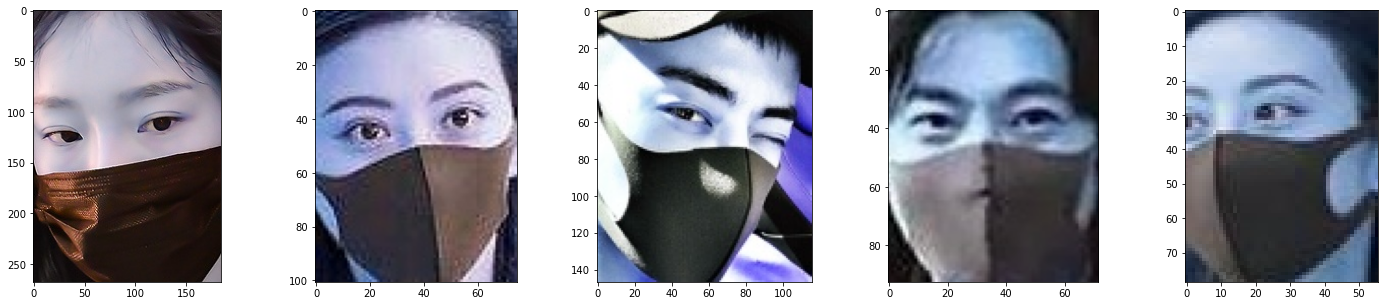

In [53]:
withmask_img=glob.glob("data/with_mask/*.jpg")

r = random.sample(withmask_img, 5)
fig,ax=plt.subplots(1,5,figsize=(25,5))
ax[0].imshow(cv2.imread(r[0]))
ax[1].imshow(cv2.imread(r[1]))
ax[2].imshow(cv2.imread(r[2]))
ax[3].imshow(cv2.imread(r[3]))
ax[4].imshow(cv2.imread(r[4]))
plt.show()


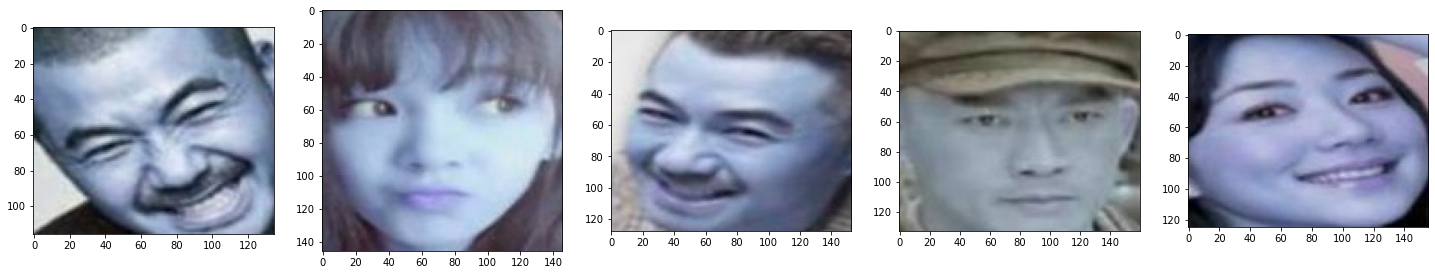

In [55]:
withoutmask_img=glob.glob("data/without_mask/*.jpg")

r = random.sample(withoutmask_img, 5)
fig,ax=plt.subplots(1,5,figsize=(25,5))
ax[0].imshow(cv2.imread(r[0]))
ax[1].imshow(cv2.imread(r[1]))
ax[2].imshow(cv2.imread(r[2]))
ax[3].imshow(cv2.imread(r[3]))
ax[4].imshow(cv2.imread(r[4]))
plt.show()


# Question 1 - Part 4.b

In [56]:
withmask_img_data = []
print("Loading Images...")
for img in withmask_img:
  withmask_img_data.append(cv2.resize(cv2.imread(img), (128,128)))

withmask_img_data = np.array(withmask_img_data)
withmask_img_data.shape


Loading Images...


(500, 128, 128, 3)

In [57]:
withoutmask_img_data = []
print("Loading Images...")
for img in withoutmask_img:
  withoutmask_img_data.append(cv2.resize(cv2.imread(img), (128,128)))

withoutmask_img_data = np.array(withoutmask_img_data)
withoutmask_img_data.shape

Loading Images...


(500, 128, 128, 3)

In [58]:
# first 500 images are with mask and last 500 are without mask
combined_images = np.concatenate([withmask_img_data, withoutmask_img_data], axis=0)
combined_images.shape

(1000, 128, 128, 3)

In [59]:
combined_images = combined_images.reshape((1000, 128*128*3))
combined_images.shape

(1000, 49152)

In [60]:
tsne = TSNE(n_components=2, verbose=2).fit_transform(combined_images)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 6.798s...
[t-SNE] Computed neighbors for 1000 samples in 103.951s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 3872.563492
[t-SNE] Computed conditional probabilities in 0.128s
[t-SNE] Iteration 50: error = 76.3638611, gradient norm = 0.3234088 (50 iterations in 0.204s)
[t-SNE] Iteration 100: error = 77.7890778, gradient norm = 0.2984551 (50 iterations in 0.169s)
[t-SNE] Iteration 150: error = 78.6581650, gradient norm = 0.2932442 (50 iterations in 0.186s)
[t-SNE] Iteration 200: error = 80.4880066, gradient norm = 0.2988243 (50 iterations in 0.179s)
[t-SNE] Iteration 250: error = 79.4780579, gradient norm = 0.2829905 (50 iterations in 0.185s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.478058
[t-SNE] Iteration 300: error = 1.6277817, gradient norm = 0.0041978 (50 iterations in 0.156s)
[t-SNE] Iteration 350: error = 1.4540498, gradient norm = 0.

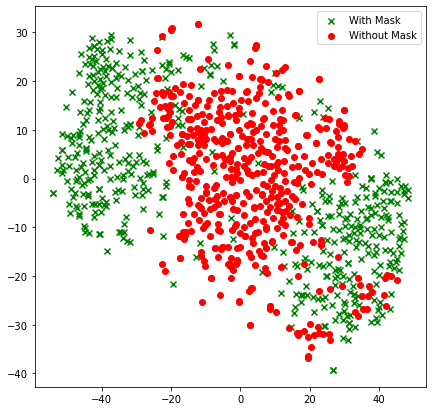

In [61]:
plt.figure(figsize=(7,7))
plt.scatter(tsne[:500, 0], tsne[:500, 1], color='green', label='With Mask', marker='x')
plt.scatter(tsne[500:, 0], tsne[500:, 1], color='red', label='Without Mask', marker='o')
plt.legend()
plt.show()